In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected = True)

In [2]:
data = pd.read_csv('GOOG1.csv')

In [3]:
data.count()

Date         2698
Open         2698
High         2698
Low          2698
Close        2698
Adj Close    2698
Volume       2698
dtype: int64

In [4]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df = data[['Date','Close']]
print(df.head())
print(df.tail())

         Date       Close
0  2010-06-07  241.853470
1  2010-06-08  241.484848
2  2010-06-09  236.124939
3  2010-06-10  242.595688
4  2010-06-11  243.337906
            Date        Close
2693  2021-02-17  2128.310059
2694  2021-02-18  2117.199951
2695  2021-02-19  2101.139893
2696  2021-02-22  2064.879883
2697  2021-02-23  2070.860107


In [6]:
df = df.rename(columns={'Date':'ds', 'Close':'y'})

In [7]:
df.head()

,ds,y
0,2010-06-07,241.853470
1,2010-06-08,241.484848
2,2010-06-09,236.124939
3,2010-06-10,242.595688
4,2010-06-11,243.337906


In [8]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
#Model
from fbprophet import Prophet
model = Prophet(daily_seasonality=True)
model.fit(df)

In [12]:
future = model.make_future_dataframe(periods=365)
print(future.head())
print(future.tail())

          ds
0 2010-06-07
1 2010-06-08
2 2010-06-09
3 2010-06-10
4 2010-06-11
             ds
3058 2022-02-19
3059 2022-02-20
3060 2022-02-21
3061 2022-02-22
3062 2022-02-23


In [14]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
3058,2022-02-19,2112.048646,2240.419515,1969.233468
3059,2022-02-20,2111.539137,2244.686806,1967.584465
3060,2022-02-21,2112.743034,2251.923451,1962.957827
3061,2022-02-22,2112.683725,2248.749205,1954.017826
3062,2022-02-23,2112.255703,2250.145540,1967.151061


In [15]:
new_df = df.copy()

In [16]:
new_df['Predicted'] = forecast.yhat

In [17]:
new_df = new_df.rename(columns={'y':'Actual'})

In [29]:
new_df['Residuals'] = new_df['Actual'] - new_df['Predicted']
new_df['Residuals Percentage'] = ((new_df['Actual'] - new_df['Predicted'])/new_df['Actual']) * 100
new_df = new_df.rename(columns={'ds':'Date'})

In [30]:
new_df.head()

,Date,Actual,Predicted,Residuals,Residuals Percentage
0,2010-06-07,241.853470,242.106781,-0.253311,-0.104737
1,2010-06-08,241.484848,242.498295,-1.013447,-0.419673
2,2010-06-09,236.124939,242.576926,-6.451987,-2.732446
3,2010-06-10,242.595688,241.921629,0.674059,0.277853
4,2010-06-11,243.337906,240.575610,2.762296,1.135169


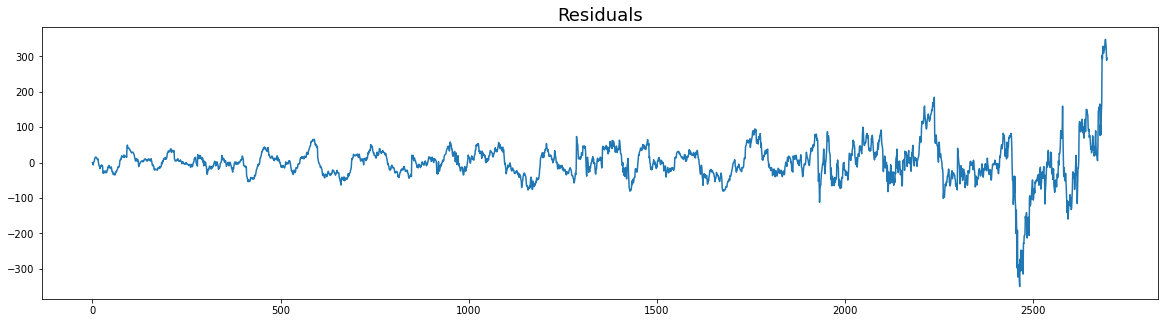

In [23]:
new_df.Residuals.plot(figsize=(20,5))
plt.title('Residuals', size= 18)
plt.show()

Text(53.5, 0.5, 'Prices')

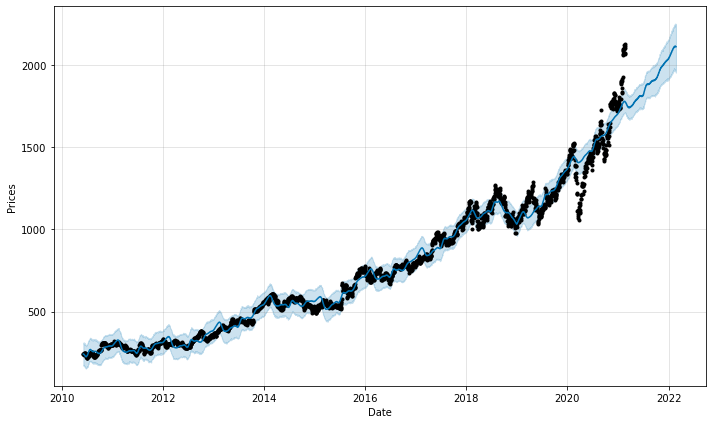

In [31]:
fig1 = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Prices')

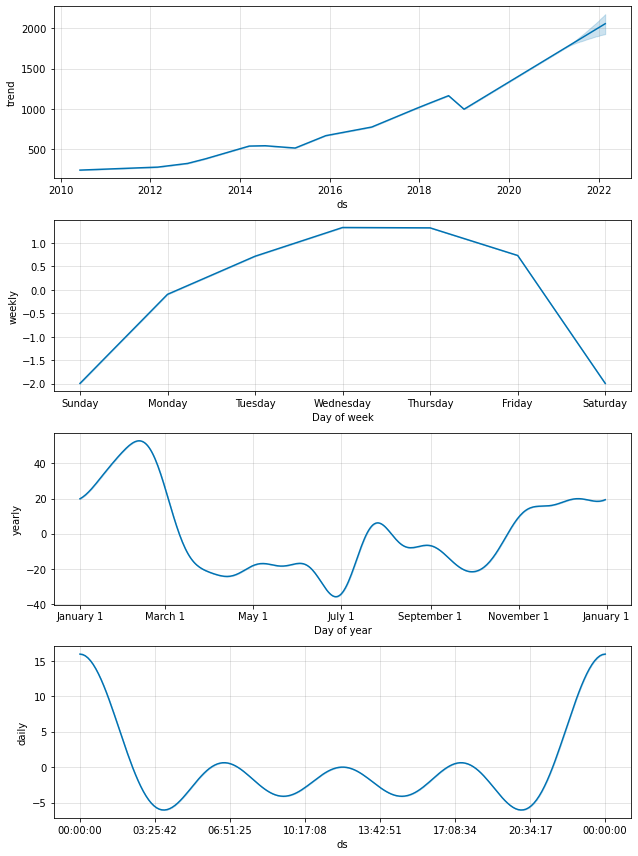

In [33]:
fig2 = model.plot_components(forecast)